In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import efinance as ef
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import matplotlib.dates as mdates
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

In [3]:
d1=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_DCE_I_2023-09.csv")
d2=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_DCE_I_2023-10.csv")
d3=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_DCE_I_2023-11.csv")
d4=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_DCE_I_2023-12.csv")

In [4]:
df1=pd.concat([d1,d2,d3,d4],axis=0,ignore_index=True)
df1

,settlement_date,recv_time,instrument,exch_datetime,bid_px_0,ask_px_0,bid_sz_0,ask_sz_0,bid_nm_0,ask_nm_0,...,open_interest,session,toa,tob,tod,deep_tk,avgp_tk,target_fut,target1m,target5m
0,2023-09-01,2023-08-31 21:00:00.457291000,FUT_DCE_I:202401,2023-08-31 21:00:00.198,851.5,852.0,218,9,0,0,...,732543,78,0,0,0,0,0,-1.50,-1.50,-1.00
1,2023-09-01,2023-08-31 21:00:00.690880000,FUT_DCE_I:202401,2023-08-31 21:00:00.447,852.0,853.0,43,593,3,21,...,732606,78,303,0,117,1705,1709,-2.25,-2.25,-1.75
2,2023-09-01,2023-08-31 21:00:00.939824000,FUT_DCE_I:202401,2023-08-31 21:00:00.698,852.5,853.0,6,369,0,14,...,732634,78,401,302,0,0,1709,-2.50,-2.50,-2.00
3,2023-09-01,2023-08-31 21:00:01.186958000,FUT_DCE_I:202401,2023-08-31 21:00:00.949,853.0,853.5,95,324,0,12,...,732541,78,464,177,0,0,1710,-3.00,-3.00,-2.50
4,2023-09-01,2023-08-31 21:00:01.435081000,FUT_DCE_I:202401,2023-08-31 21:00:01.198,852.5,853.0,74,52,0,0,...,732470,78,0,628,55,1705,1710,-3.00,-3.00,-2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865023,2023-12-29,2023-12-29 14:59:58.848077000,FUT_DCE_I:202405,2023-12-29 14:59:57.219,978.5,979.0,9,368,0,47,...,525794,68,7,7,0,0,1962,NaN,NaN,NaN
5865024,2023-12-29,2023-12-29 14:59:59.098012000,FUT_DCE_I:202405,2023-12-29 14:59:57.463,978.5,979.0,2,372,0,47,...,525799,68,0,7,0,0,1961,NaN,NaN,NaN
5865025,2023-12-29,2023-12-29 14:59:59.347657000,FUT_DCE_I:202405,2023-12-29 14:59:57.688,978.0,978.5,9,5,0,0,...,525792,68,4,5,0,0,1961,NaN,NaN,NaN
5865026,2023-12-29,2023-12-29 14:59:59.597453000,FUT_DCE_I:202405,2023-12-29 14:59:57.937,978.0,978.5,9,8,0,0,...,525791,68,1,0,0,0,1961,NaN,NaN,NaN


In [5]:
f1=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_SHFE_RB_2023-09.csv")
f2=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_SHFE_RB_2023-10.csv")
f3=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_SHFE_RB_2023-11.csv")
f4=pd.read_csv("C:/Users/hp/Desktop/yujin数据/FUT_SHFE_RB_2023-12.csv")

In [6]:
df2=pd.concat([f1,f2,f3,f4],axis=0,ignore_index=True)
df2

,settlement_date,recv_time,instrument,exch_datetime,bid_px_0,ask_px_0,bid_sz_0,ask_sz_0,bid_nm_0,ask_nm_0,...,open_interest,session,toa,tob,tod,deep_tk,avgp_tk,target_fut,target1m,target5m
0,2023-09-01,2023-08-31 21:00:00.826328288,FUT_SHFE_RB:202401,2023-08-31 21:00:00.500,3768.0,3769.0,654,176,0,0,...,1231850,78,0,0,0,0,0,7.0,7.0,2.0
1,2023-09-01,2023-08-31 21:00:01.329334561,FUT_SHFE_RB:202401,2023-08-31 21:00:01.000,3769.0,3772.0,187,184,0,0,...,1232156,78,1727,0,1388,3770,3771,4.0,4.0,0.0
2,2023-09-01,2023-08-31 21:00:01.828570695,FUT_SHFE_RB:202401,2023-08-31 21:00:01.500,3775.0,3776.0,5,21,0,0,...,1231946,78,1885,0,1690,3774,3775,0.5,0.5,-5.0
3,2023-09-01,2023-08-31 21:00:02.333488042,FUT_SHFE_RB:202401,2023-08-31 21:00:02.000,3776.0,3778.0,7,562,0,0,...,1231916,78,675,496,0,0,3777,-2.5,-2.5,-6.5
4,2023-09-01,2023-08-31 21:00:02.833463820,FUT_SHFE_RB:202401,2023-08-31 21:00:02.500,3775.0,3777.0,2,24,0,0,...,1232000,78,0,611,433,3775,3776,-0.5,-0.5,-4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3246250,2023-12-29,2023-12-29 14:59:57.817176383,FUT_SHFE_RB:202405,2023-12-29 14:59:57.500,4003.0,4004.0,303,56,0,0,...,1398555,68,0,520,232,4003,4005,NaN,NaN,NaN
3246251,2023-12-29,2023-12-29 14:59:58.325234912,FUT_SHFE_RB:202405,2023-12-29 14:59:58.000,4003.0,4004.0,130,51,0,0,...,1398392,68,35,173,0,0,4004,NaN,NaN,NaN
3246252,2023-12-29,2023-12-29 14:59:58.803703659,FUT_SHFE_RB:202405,2023-12-29 14:59:58.500,4002.0,4003.0,288,140,0,0,...,1398530,68,127,218,0,0,4004,NaN,NaN,NaN
3246253,2023-12-29,2023-12-29 14:59:59.306469355,FUT_SHFE_RB:202405,2023-12-29 14:59:59.000,4002.0,4003.0,247,116,0,0,...,1398494,68,26,43,0,0,4003,NaN,NaN,NaN


In [7]:
def calculate_metrics(df):
    """核心指标计算"""
    # 基础指标
    df['mid_price'] = 0.5 * (df['bid_px_0'] + df['ask_px_0'])
    
    df['weighted_mid'] = (df['bid_px_0']*df['ask_sz_0'] + df['ask_px_0']*\
        df['bid_sz_0']) / (df['ask_sz_0'] + df['bid_sz_0'])
    
    df['fair_price_l1']=( (df['bid_px_0']*df['bid_sz_0']+df['ask_px_0']*df['ask_sz_0']) \
        )/( (df['ask_sz_0']+df['bid_sz_0'])  )
    #基于5档快照数据改进
    df['fair_price_L2']=sum([ (df[f'bid_px_{x}']*df[f'bid_sz_{x}']+df[f'ask_px_{x}']*df[f'ask_sz_{x}']) \
        for x in range(5)])/sum([ (df[f'ask_sz_{x}']+df[f'bid_sz_{x}'])  for x in range(5)])
    
    df['mid_price_l2'] =sum( [(df[f'bid_px_{x}'] + df[f'ask_px_{x}']) for x in range(5)])/10
    
    
    df['weighted_mid_l2']=sum( [(df['bid_px_0']*df['ask_sz_0']+df['ask_px_0']*df['bid_sz_0']) \
     for x in range(5)  ]  )/sum([ (df['ask_sz_0']+df['bid_sz_0'])  for x in range(5) ])
    
 
    return df

In [8]:
df=d1
df=calculate_metrics(df)
df

,settlement_date,recv_time,instrument,exch_datetime,bid_px_0,ask_px_0,bid_sz_0,ask_sz_0,bid_nm_0,ask_nm_0,...,avgp_tk,target_fut,target1m,target5m,mid_price,weighted_mid,fair_price_l1,fair_price_L2,mid_price_l2,weighted_mid_l2
0,2023-09-01,2023-08-31 21:00:00.457291000,FUT_DCE_I:202401,2023-08-31 21:00:00.198,851.5,852.0,218,9,0,0,...,0,-1.50,-1.50,-1.00,851.75,851.980176,851.519824,852.475165,851.75,851.980176
1,2023-09-01,2023-08-31 21:00:00.690880000,FUT_DCE_I:202401,2023-08-31 21:00:00.447,852.0,853.0,43,593,3,21,...,1709,-2.25,-2.25,-1.75,852.50,852.067610,852.932390,853.335361,852.50,852.067610
2,2023-09-01,2023-08-31 21:00:00.939824000,FUT_DCE_I:202401,2023-08-31 21:00:00.698,852.5,853.0,6,369,0,14,...,1709,-2.50,-2.50,-2.00,852.75,852.508000,852.992000,853.698224,852.75,852.508000
3,2023-09-01,2023-08-31 21:00:01.186958000,FUT_DCE_I:202401,2023-08-31 21:00:00.949,853.0,853.5,95,324,0,12,...,1710,-3.00,-3.00,-2.50,853.25,853.113365,853.386635,854.070737,853.25,853.113365
4,2023-09-01,2023-08-31 21:00:01.435081000,FUT_DCE_I:202401,2023-08-31 21:00:01.198,852.5,853.0,74,52,0,0,...,1710,-3.00,-3.00,-2.00,852.75,852.793651,852.706349,853.727980,852.75,852.793651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531155,2023-09-28,2023-09-28 14:59:58.880214000,FUT_DCE_I:202401,2023-09-28 14:59:57.259,851.5,852.5,107,551,0,15,...,1709,NaN,NaN,NaN,852.00,851.662614,852.337386,852.331348,852.00,851.662614
1531156,2023-09-28,2023-09-28 14:59:59.132309000,FUT_DCE_I:202401,2023-09-28 14:59:57.460,852.0,852.5,15,553,0,25,...,1709,NaN,NaN,NaN,852.25,852.013204,852.486796,852.358223,852.25,852.013204
1531157,2023-09-28,2023-09-28 14:59:59.382939000,FUT_DCE_I:202401,2023-09-28 14:59:57.736,852.0,852.5,6,331,0,25,...,1709,NaN,NaN,NaN,852.25,852.008902,852.491098,852.350485,852.25,852.008902
1531158,2023-09-28,2023-09-28 14:59:59.632349000,FUT_DCE_I:202401,2023-09-28 14:59:57.959,851.5,852.5,103,331,0,25,...,1708,NaN,NaN,NaN,852.00,851.737327,852.262673,852.316569,852.00,851.737327


In [9]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# JB 检验函数
def jb_test(returns, alpha=0.05):
    # 计算JB统计量和p值
    jb_stat, p_value = stats.jarque_bera(returns)
    
    # 临界值（卡方分布，自由度=2）
    critical_value = stats.chi2.ppf(1 - alpha, df=2)
    
    # 结果表格
    result_df = pd.DataFrame({
        'Metric': ['JB Statistic', 'p-value', f'Critical Value (α={alpha})'],
        'Value': [jb_stat, p_value, critical_value]
    })
    
    # 判断结论
    conclusion = "拒绝原假设（非正态分布）" if p_value < alpha else "无法拒绝原假设（正态分布）"
    
    return result_df, conclusion

| Metric                  |      Value |
|:------------------------|-----------:|
| JB Statistic            | 1.6975e+09 |
| p-value                 | 0          |
| Critical Value (α=0.05) | 5.99146    |

结论: 拒绝原假设（非正态分布）


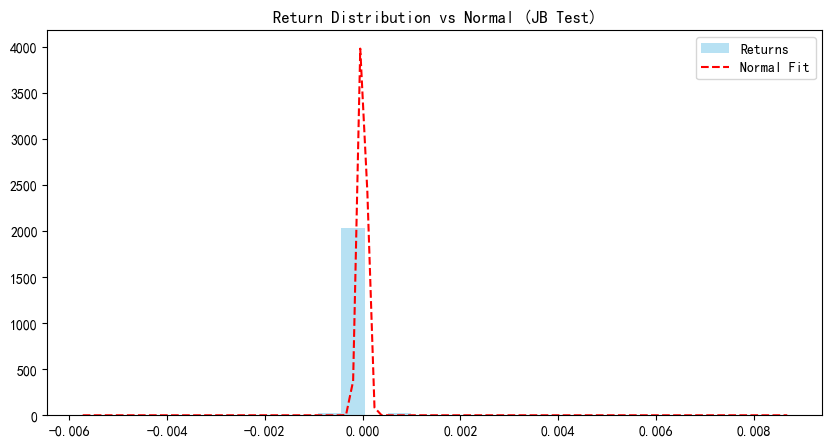

| Metric                  |       Value |
|:------------------------|------------:|
| JB Statistic            | 1.73575e+11 |
| p-value                 | 0           |
| Critical Value (α=0.05) | 5.99146     |

结论: 拒绝原假设（非正态分布）


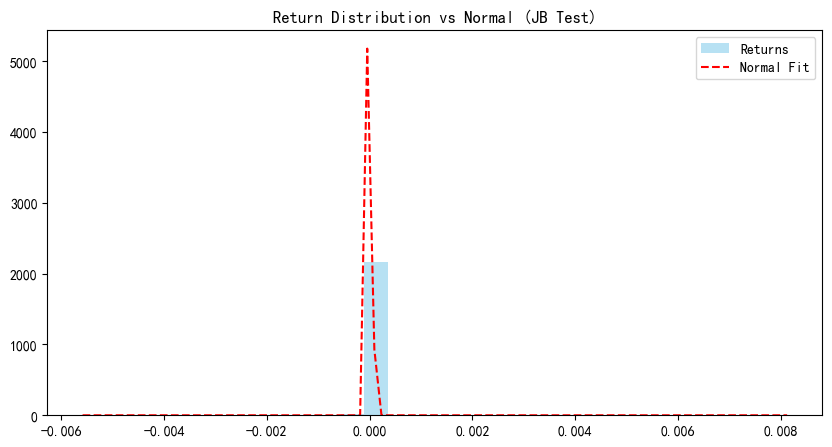

| Metric                  |     Value |
|:------------------------|----------:|
| JB Statistic            | 2.428e+08 |
| p-value                 | 0         |
| Critical Value (α=0.05) | 5.99146   |

结论: 拒绝原假设（非正态分布）


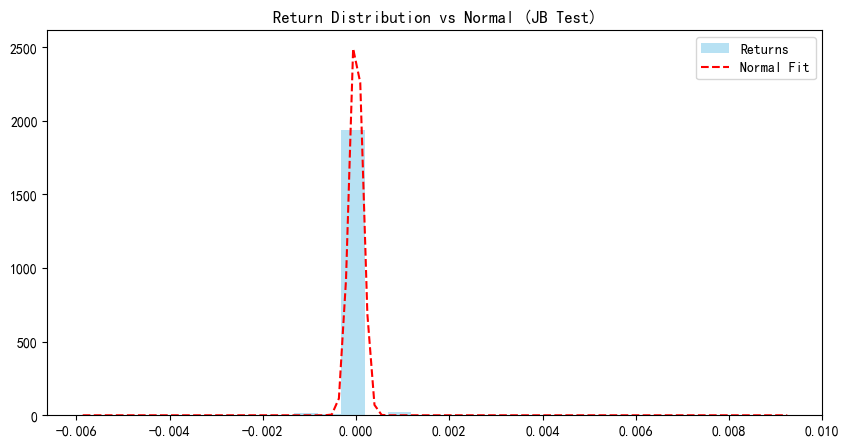

| Metric                  |       Value |
|:------------------------|------------:|
| JB Statistic            | 1.66504e+09 |
| p-value                 | 0           |
| Critical Value (α=0.05) | 5.99146     |

结论: 拒绝原假设（非正态分布）


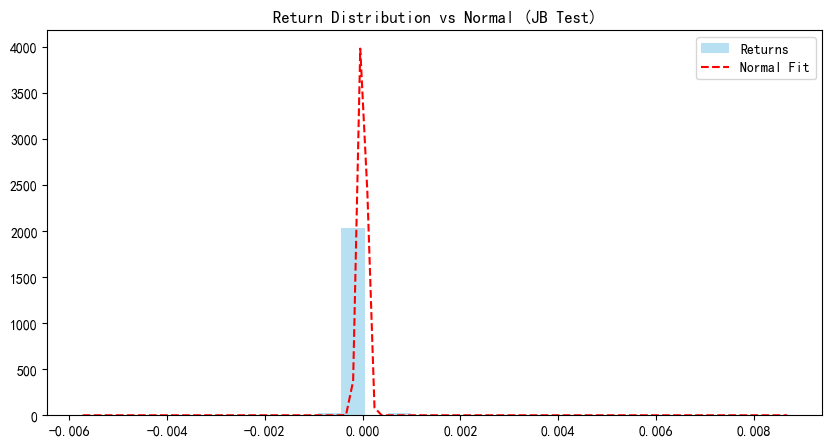

| Metric                  |       Value |
|:------------------------|------------:|
| JB Statistic            | 1.73575e+11 |
| p-value                 | 0           |
| Critical Value (α=0.05) | 5.99146     |

结论: 拒绝原假设（非正态分布）


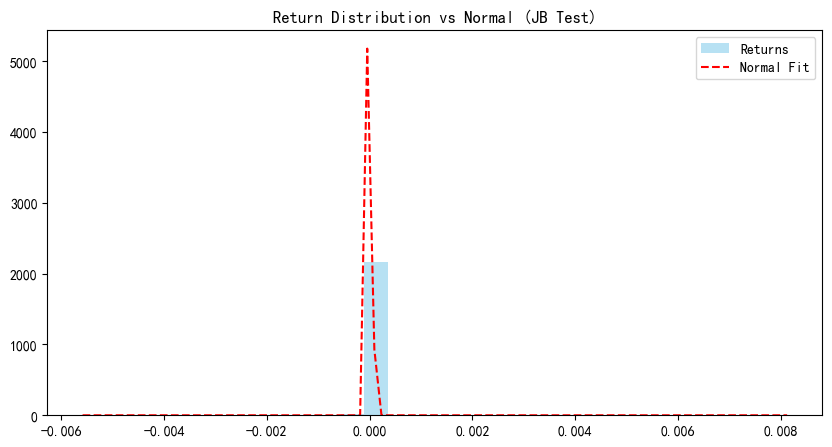

| Metric                  |       Value |
|:------------------------|------------:|
| JB Statistic            | 1.12797e+09 |
| p-value                 | 0           |
| Critical Value (α=0.05) | 5.99146     |

结论: 拒绝原假设（非正态分布）


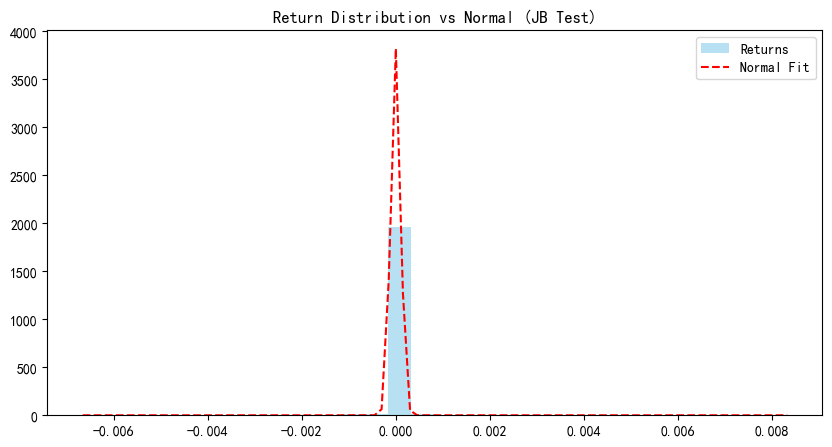

In [10]:
def is_good_price(df,col):
    returns=df[col].pct_change().fillna(0)
    # 执行检验
    result_table, conclusion = jb_test(returns)
    print(result_table.to_markdown(index=False))
    print("\n结论:", conclusion)
    # 可视化分布
    plt.figure(figsize=(10, 5))
    plt.hist(returns, bins=30, density=True, alpha=0.6, color='skyblue', label='Returns')
    x = np.linspace(returns.min(), returns.max(), 100)
    plt.plot(x, stats.norm.pdf(x, np.mean(returns), np.std(returns)), 
            'r--', label='Normal Fit')
    plt.title('Return Distribution vs Normal (JB Test)')
    plt.legend()
    plt.show()
    
is_good_price(df,'mid_price')
is_good_price(df,'weighted_mid')
is_good_price(df,'fair_price_l1')
is_good_price(df,'mid_price_l2')
is_good_price(df,'weighted_mid_l2')
is_good_price(df,'fair_price_L2')

In [11]:
#shift 1
df['my_factor']=(df['toa']+df['tob']+df['tod']+df['deep_tk']+df['avgp_tk'])/5
df=df.fillna(0)
ic_1m,_=pearsonr(df['my_factor'],df['target1m'])
rankic_1m,_=spearmanr(df['my_factor'],df['target1m'])
ic_5m,_=pearsonr(df['my_factor'],df['target5m'])
rankic_5m,_=spearmanr(df['my_factor'],df['target5m'])
result_data = [
        {"index_name": f"my_factor预测target1m ic", "index_value": ic_1m},
        {"index_name": f"my_factor预测target5m ic", "index_value": ic_5m},
        {"index_name": f"my_factor预测target1m rankic", "index_value": rankic_1m},
        {"index_name": f"my_factor预测target5m rankic", "index_value": rankic_5m}
    ]
result_data  

[{'index_name': 'my_factor预测target1m ic',
  'index_value': np.float64(-0.006522406151358948)},
 {'index_name': 'my_factor预测target5m ic',
  'index_value': np.float64(-0.008254605314711474)},
 {'index_name': 'my_factor预测target1m rankic',
  'index_value': np.float64(-0.010445071710074211)},
 {'index_name': 'my_factor预测target5m rankic',
  'index_value': np.float64(-0.01677352730865144)}]

In [ ]:
mean=df['target1m'].mean()
std=df['target1m'].std()
mask=df[(df['target1m']>mean+std)|(df['target1m']<mean-std)]
df['is_high_volitility']=np.where(mask,1,0)
df.set_index('exch_datetime',inplace=True)
df

,settlement_date,recv_time,instrument,bid_px_0,ask_px_0,bid_sz_0,ask_sz_0,bid_nm_0,ask_nm_0,bid_px_1,...,target1m,target5m,mid_price,weighted_mid,fair_price_l1,fair_price_L2,mid_price_l2,weighted_mid_l2,my_factor,is_high_volitility
exch_datetime,,,,,,,,,,,,,,,,,,,,,
2023-08-31 21:00:00.198,2023-09-01,2023-08-31 21:00:00.457291000,FUT_DCE_I:202401,851.5,852.0,218,9,0,0,851.0,...,-1.50,-1.00,851.75,851.980176,851.519824,852.475165,851.75,851.980176,0.0,0
2023-08-31 21:00:00.447,2023-09-01,2023-08-31 21:00:00.690880000,FUT_DCE_I:202401,852.0,853.0,43,593,3,21,851.5,...,-2.25,-1.75,852.50,852.067610,852.932390,853.335361,852.50,852.067610,766.8,0
2023-08-31 21:00:00.698,2023-09-01,2023-08-31 21:00:00.939824000,FUT_DCE_I:202401,852.5,853.0,6,369,0,14,852.0,...,-2.50,-2.00,852.75,852.508000,852.992000,853.698224,852.75,852.508000,482.4,0
2023-08-31 21:00:00.949,2023-09-01,2023-08-31 21:00:01.186958000,FUT_DCE_I:202401,853.0,853.5,95,324,0,12,852.5,...,-3.00,-2.50,853.25,853.113365,853.386635,854.070737,853.25,853.113365,470.2,0
2023-08-31 21:00:01.198,2023-09-01,2023-08-31 21:00:01.435081000,FUT_DCE_I:202401,852.5,853.0,74,52,0,0,852.0,...,-3.00,-2.00,852.75,852.793651,852.706349,853.727980,852.75,852.793651,819.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-28 14:59:57.259,2023-09-28,2023-09-28 14:59:58.880214000,FUT_DCE_I:202401,851.5,852.5,107,551,0,15,851.0,...,0.00,0.00,852.00,851.662614,852.337386,852.331348,852.00,851.662614,356.0,0
2023-09-28 14:59:57.460,2023-09-28,2023-09-28 14:59:59.132309000,FUT_DCE_I:202401,852.0,852.5,15,553,0,25,851.5,...,0.00,0.00,852.25,852.013204,852.486796,852.358223,852.25,852.013204,344.8,0
2023-09-28 14:59:57.736,2023-09-28,2023-09-28 14:59:59.382939000,FUT_DCE_I:202401,852.0,852.5,6,331,0,25,851.5,...,0.00,0.00,852.25,852.008902,852.491098,852.350485,852.25,852.008902,388.4,0


In [ ]:
df['target1m']

In [ ]:
1+df['target1m'].cumsum()

In [54]:
def ploot1(target,model,X,y):
    
    # 确保时间列转换为datetime类型
    df['exch_datetime'] = pd.to_datetime(df['exch_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

    # 创建时间序列绘图
    plt.figure(figsize=(16, 8))

    # 绘制真实值（带数据采样优化）
    plt.plot(df['exch_datetime'].iloc[::10],  # 每100个点取1个
            (1+df[target].cumsum()).iloc[::10], 
            color='#2ca02c',   # 苹果绿
            alpha=0.7,
            linewidth=1.2,
            label='真实值')

    # 绘制预测值（带滚动平均优化）
    window_size = 1  # 100点滚动窗口
    predict_smooth = model.predict(X).rolling(window_size, min_periods=1).mean()
    plt.plot(df['exch_datetime'].iloc[::10],
            (1+predict_smooth.cumsum()).iloc[::10],
            color='#d62728',   # 警报红
            linestyle='--',
            linewidth=1.5,
            label='预测值')

    # 时间轴格式化
    plt.gca().xaxis.set_major_formatter(
        mdates.DateFormatter('%m-%d %H:%M'))  # 显示月-日 时:分
    plt.xticks(rotation=45)
    plt.gcf().autofmt_xdate()  # 自动调整日期标签

    # 可视化增强
    plt.ylabel('收益率 (%)', fontsize=12)
    plt.title('高频交易收益率预测效果对比 (2023-08-31 至 2023-09-28)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper left', frameon=True)

    # 大数据渲染优化
    plt.tight_layout()
    plt.gcf().set_facecolor('#f5f5f5')  # 浅灰色背景
    plt.savefig('prediction_comparison.png', dpi=300, bbox_inches='tight')  # 保存高清图
    plt.show()

In [43]:
def ploot(target,model,X,y):
    
    # 确保时间列转换为datetime类型
    df['exch_datetime'] = pd.to_datetime(df['exch_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

    # 创建时间序列绘图
    plt.figure(figsize=(16, 8))

    # 绘制真实值（带数据采样优化）
    plt.plot(df['exch_datetime'].iloc[::10],  # 每100个点取1个
            df[target].iloc[::10], 
            color='#2ca02c',   # 苹果绿
            alpha=0.7,
            linewidth=1.2,
            label='真实值')

    # 绘制预测值（带滚动平均优化）
    window_size = 1  # 100点滚动窗口
    predict_smooth = model.predict(X).rolling(window_size, min_periods=1).mean()
    plt.plot(df['exch_datetime'].iloc[::10],
            predict_smooth.iloc[::10],
            color='#d62728',   # 警报红
            linestyle='--',
            linewidth=1.5,
            label='预测值')

    # 时间轴格式化
    plt.gca().xaxis.set_major_formatter(
        mdates.DateFormatter('%m-%d %H:%M'))  # 显示月-日 时:分
    plt.xticks(rotation=45)
    plt.gcf().autofmt_xdate()  # 自动调整日期标签

    # 可视化增强
    plt.ylabel('收益率 (%)', fontsize=12)
    plt.title('高频交易收益率预测效果对比 (2023-08-31 至 2023-09-28)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper left', frameon=True)

    # 大数据渲染优化
    plt.tight_layout()
    plt.gcf().set_facecolor('#f5f5f5')  # 浅灰色背景
    plt.savefig('prediction_comparison.png', dpi=300, bbox_inches='tight')  # 保存高清图
    plt.show()

=== target1m 回归结果 ===
                            OLS Regression Results                            
Dep. Variable:               target1m   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     65.14
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           6.98e-16
Time:                        16:53:57   Log-Likelihood:            -1.6080e+06
No. Observations:             1531160   AIC:                         3.216e+06
Df Residuals:                 1531158   BIC:                         3.216e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.0

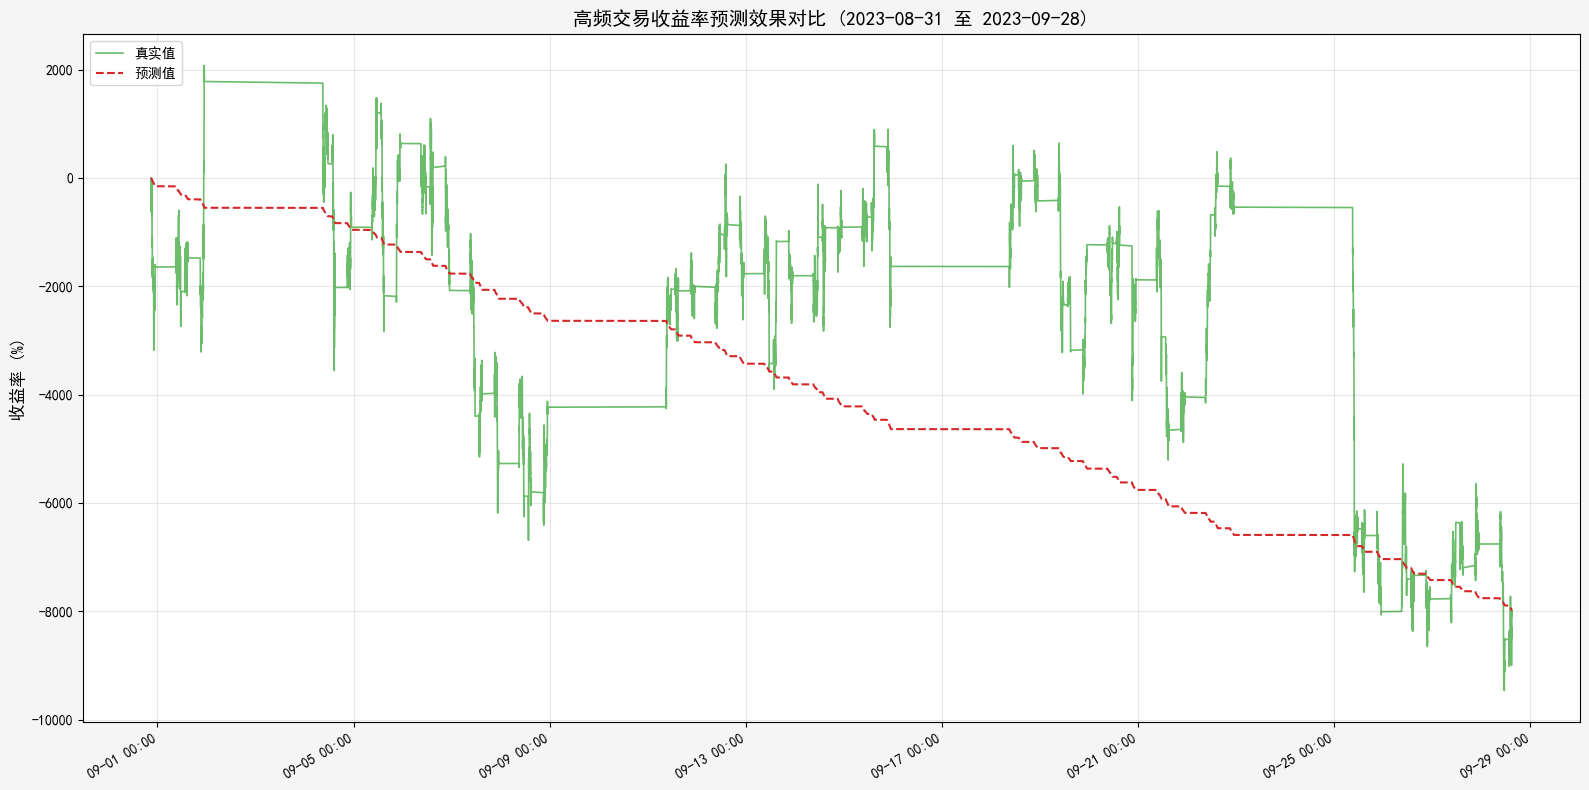

In [55]:
import statsmodels.api as sm
# 添加常数项
X = sm.add_constant(df[['my_factor']])
y = df['target1m']

# OLS回归
model1 = sm.OLS(y, X).fit()
print("=== target1m 回归结果 ===")
print(model1.summary())

ploot1('target1m',model1,X,y)

=== target1m 回归结果 ===
                            OLS Regression Results                            
Dep. Variable:               target5m   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           1.71e-24
Time:                        16:54:09   Log-Likelihood:            -2.7592e+06
No. Observations:             1531160   AIC:                         5.518e+06
Df Residuals:                 1531158   BIC:                         5.518e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.0

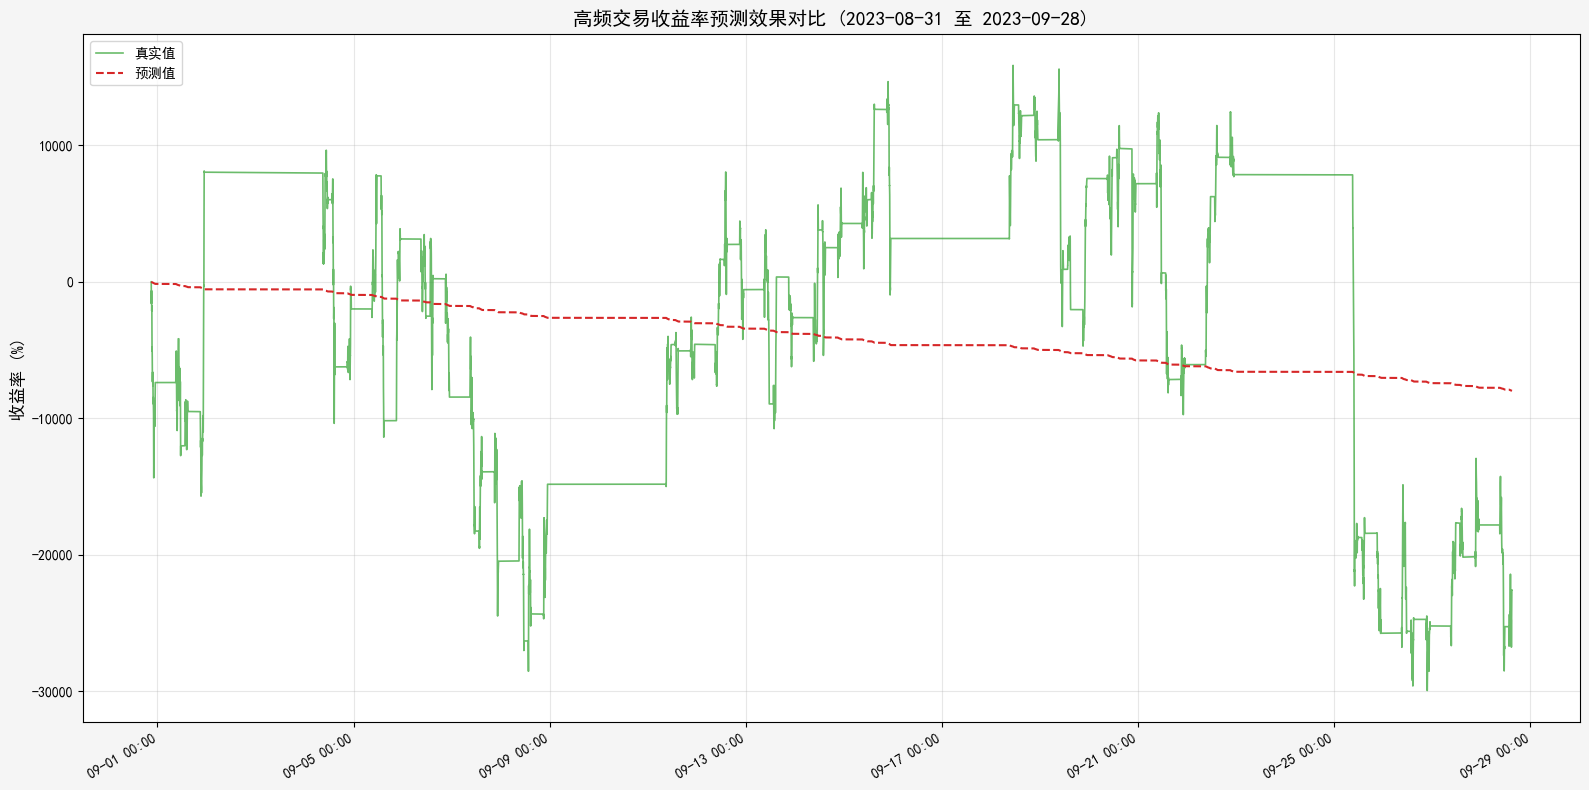

In [56]:
# 添加常数项
X = sm.add_constant(df[['my_factor']])
y = df['target5m']

# OLS回归
model5 = sm.OLS(y, X).fit()
print("=== target1m 回归结果 ===")
print(model5.summary())

ploot1('target5m',model1,X,y)


=== 高波动组回归结果 ===
                            OLS Regression Results                            
Dep. Variable:               target1m   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1155.
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          2.46e-252
Time:                        16:54:46   Log-Likelihood:                -76247.
No. Observations:              169275   AIC:                         1.525e+05
Df Residuals:                  169273   BIC:                         1.525e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1624      0.001  

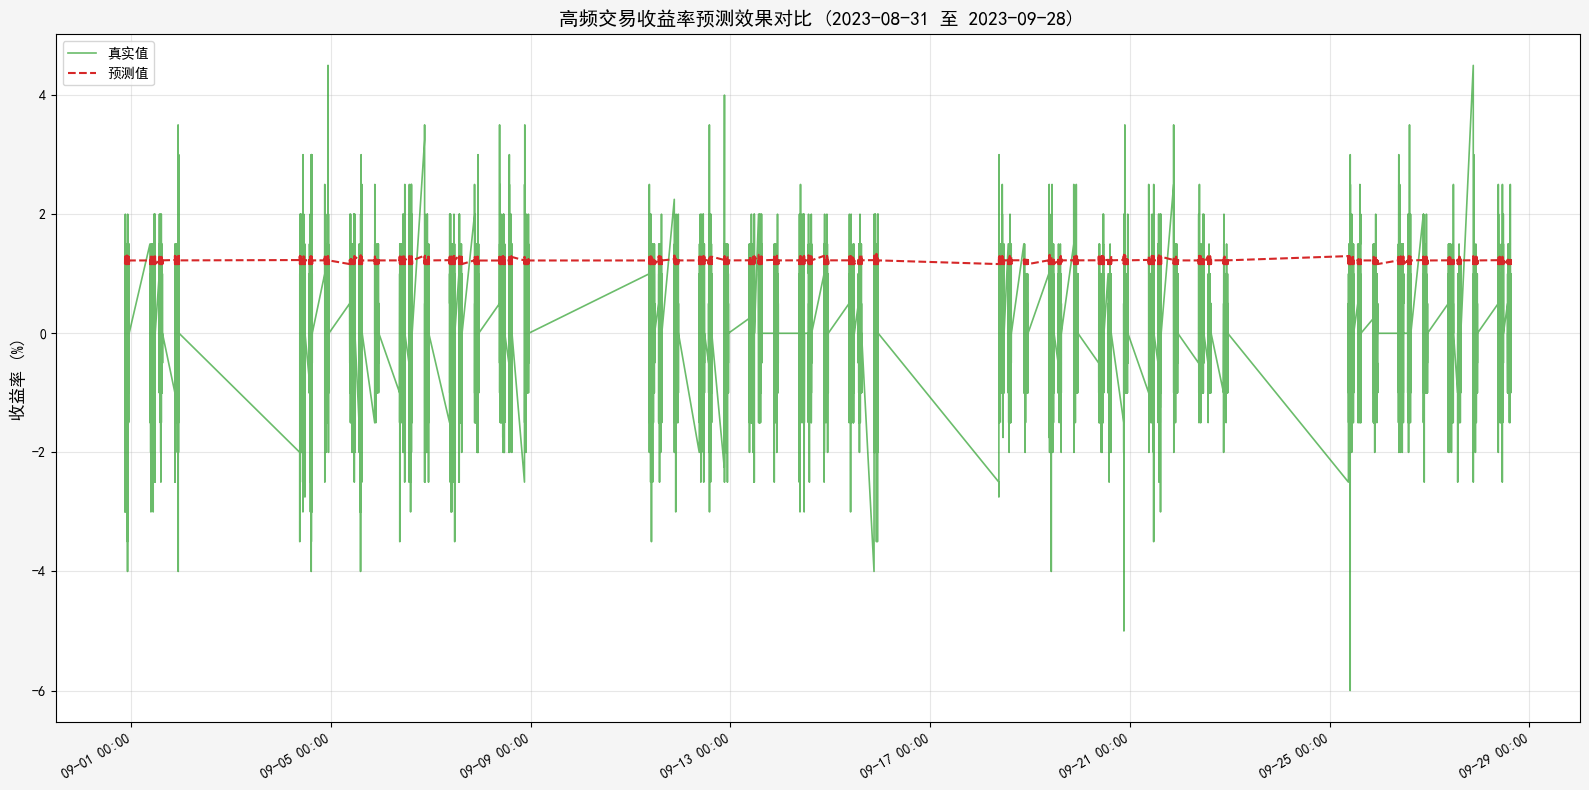


=== 低波动组回归结果 ===
                            OLS Regression Results                            
Dep. Variable:               target1m   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3981.
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:54:49   Log-Likelihood:            -1.1492e+06
No. Observations:             1361885   AIC:                         2.298e+06
Df Residuals:                 1361883   BIC:                         2.298e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1248      0.001  

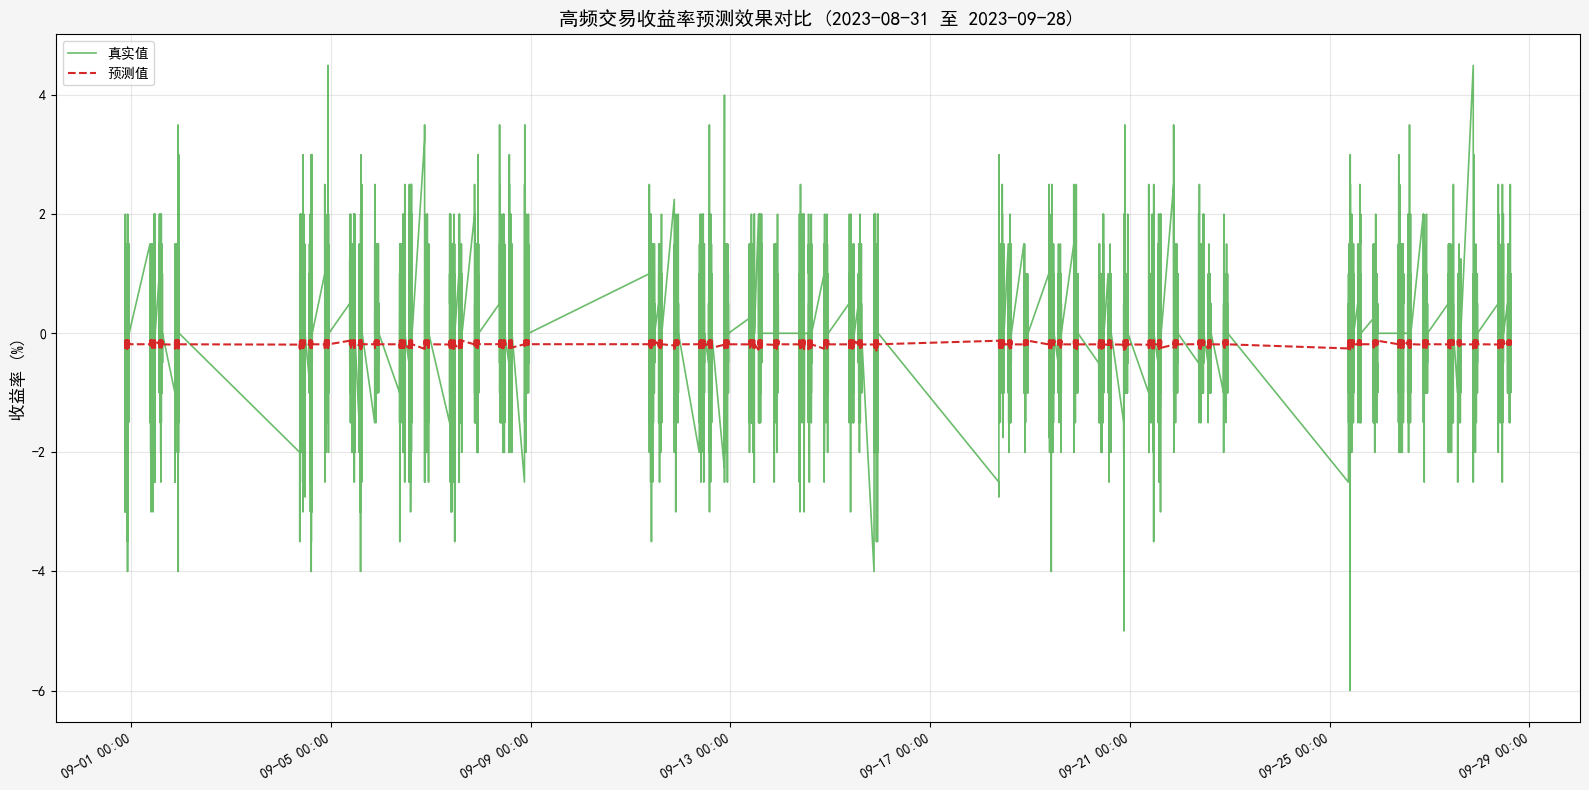

In [58]:
# 生成波动性分组（假设is_high_volatility已定义）
df_high = df[df['is_high_volitility'] == 1]
df_low = df[df['is_high_volitility'] == 0]

# 高波动组
print("\n=== 高波动组回归结果 ===")
X_high = sm.add_constant(df_high[['my_factor']])
model_high = sm.OLS(df_high['target1m'], X_high).fit()
print(model_high.summary())
ploot('target1m',model_high,X,y)
# 低波动组
print("\n=== 低波动组回归结果 ===")
X_low = sm.add_constant(df_low[['my_factor']])
model_low = sm.OLS(df_low['target1m'], X_low).fit()
print(model_low.summary())
ploot('target1m',model_low,X,y)

In [20]:
features=['toa','tob','tod','deep_tk','avgp_tk']
target='target1m'

In [21]:
df.reset_index(inplace=True)

In [22]:
df.set_index(['instrument','exch_datetime'],inplace=True)
df

settlement_date  \
instrument       exch_datetime                             
FUT_DCE_I:202401 2023-08-31 21:00:00.198      2023-09-01   
                 2023-08-31 21:00:00.447      2023-09-01   
                 2023-08-31 21:00:00.698      2023-09-01   
                 2023-08-31 21:00:00.949      2023-09-01   
                 2023-08-31 21:00:01.198      2023-09-01   
...                                                  ...   
                 2023-09-28 14:59:57.259      2023-09-28   
                 2023-09-28 14:59:57.460      2023-09-28   
                 2023-09-28 14:59:57.736      2023-09-28   
                 2023-09-28 14:59:57.959      2023-09-28   
                 2023-09-28 14:59:58.251      2023-09-28   

                                                              recv_time  \
instrument       exch_datetime                                            
FUT_DCE_I:202401 2023-08-31 21:00:00.198  2023-08-31 21:00:00.457291000   
                 2023-08-31 21:00:00.447  2023-08-31 21:00:00.690880000   
                 2023-08-31 21:00:00.698  2023-08-31 21:00:00.939824000   
                 2023-08-31 21:00:00.949  2023-08-31 21:00:01.186958000   
                 2023-08-31 21:00:01.198  2023-08-31 21:00:01.435081000   
...                                                                 ...   
                 2023-09-28 14:59:57.259  2023-09-28 14:59:58.880214000   
                 2023-09-28 14:59:57.460  2023-09-28 14:59:59.132309000   
                 2023-09-28 14:59:57.736  2023-09-28 14:59:59.382939000   
                 2023-09-28 14:59:57.959  2023-09-28 14:59:59.632349000   
                 2023-09-28 14:59:58.251  2023-09-28 14:59:59.881896000   

                                          bid_px_0  ask_px_0  bid_sz_0  \
instrument       exch_datetime                                           
FUT_DCE_I:202401 2023-08-31 21:00:00.198     851.5     852.0       218   
                 2023-08-31 21:00:00.447     852.0     853.0        43   
                 2023-08-31 21:00:00.698     852.5     853.0         6   
                 2023-08-31 21:00:00.949     853.0     853.5        95   
                 2023-08-31 21:00:01.198     852.5     853.0        74   
...                                            ...       ...       ...   
                 2023-09-28 14:59:57.259     851.5     852.5       107   
                 2023-09-28 14:59:57.460     852.0     852.5        15   
                 2023-09-28 14:59:57.736     852.0     852.5         6   
                 2023-09-28 14:59:57.959     851.5     852.5       103   
                 2023-09-28 14:59:58.251     851.5     852.0       105   

                                          ask_sz_0  bid_nm_0  ask_nm_0  \
instrument       exch_datetime                                           
FUT_DCE_I:202401 2023-08-31 21:00:00.198         9         0         0   
                 2023-08-31 21:00:00.447       593         3        21   
                 2023-08-31 21:00:00.698       369         0        14   
                 2023-08-31 21:00:00.949       324         0        12   
                 2023-08-31 21:00:01.198        52         0         0   
...                                            ...       ...       ...   
                 2023-09-28 14:59:57.259       551         0        15   
                 2023-09-28 14:59:57.460       553         0        25   
                 2023-09-28 14:59:57.736       331         0        25   
                 2023-09-28 14:59:57.959       331         0        25   
                 2023-09-28 14:59:58.251         2         0         0   

                                          bid_px_1  ask_px_1  ...  target1m  \
instrument       exch_datetime                                ...             
FUT_DCE_I:202401 2023-08-31 21:00:00.198     851.0     852.5  ...     -1.50   
                 2023-08-31 21:00:00.447     851.5     853.5  ...     -2.25   
                 2023-08-31 21:00:00.698  

In [23]:
targ_df=pd.DataFrame(df[target])
targ_df

target1m
instrument       exch_datetime                    
FUT_DCE_I:202401 2023-08-31 21:00:00.198     -1.50
                 2023-08-31 21:00:00.447     -2.25
                 2023-08-31 21:00:00.698     -2.50
                 2023-08-31 21:00:00.949     -3.00
                 2023-08-31 21:00:01.198     -3.00
...                                            ...
                 2023-09-28 14:59:57.259      0.00
                 2023-09-28 14:59:57.460      0.00
                 2023-09-28 14:59:57.736      0.00
                 2023-09-28 14:59:57.959      0.00
                 2023-09-28 14:59:58.251      0.00

[1531160 rows x 1 columns]

In [24]:
def standardize_column(x):
    if x.std() == 0:
        return x
    return (x - x.mean()) / x.std()

df_swapped = df.loc[:,features].groupby('instrument').transform(standardize_column)
df_swapped

toa        tob        tod  \
instrument       exch_datetime                                              
FUT_DCE_I:202401 2023-08-31 21:00:00.198  -0.164115  -0.169914  -0.014386   
                 2023-08-31 21:00:00.447  12.628624  -0.169914  40.839428   
                 2023-08-31 21:00:00.698  16.766210  13.138906  -0.014386   
                 2023-08-31 21:00:00.949  19.426086   7.630289  -0.014386   
                 2023-08-31 21:00:01.198  -0.164115  27.505381  19.190398   
...                                             ...        ...        ...   
                 2023-09-28 14:59:57.259   2.664643   0.006362  -0.014386   
                 2023-09-28 14:59:57.460   0.342529  -0.037707  -0.014386   
                 2023-09-28 14:59:57.736   9.208783   0.314845  -0.014386   
                 2023-09-28 14:59:57.959  -0.079674   0.270776  -0.014386   
                 2023-09-28 14:59:58.251   0.258088  -0.125845  -0.014386   

                                            deep_tk   avgp_tk  
instrument       exch_datetime                                 
FUT_DCE_I:202401 2023-08-31 21:00:00.198  -0.056265 -1.009122  
                 2023-08-31 21:00:00.447  17.751387  0.985427  
                 2023-08-31 21:00:00.698  -0.056265  0.985427  
                 2023-08-31 21:00:00.949  -0.056265  0.986594  
                 2023-08-31 21:00:01.198  17.751387  0.986594  
...                                             ...       ...  
                 2023-09-28 14:59:57.259  -0.056265  0.985427  
                 2023-09-28 14:59:57.460  -0.056265  0.985427  
                 2023-09-28 14:59:57.736  -0.056265  0.985427  
                 2023-09-28 14:59:57.959  -0.056265  0.984260  
                 2023-09-28 14:59:58.251  -0.056265  0.985427  

[1531160 rows x 5 columns]

In [48]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

  # 划分训练集和测试集
X=df_swapped
y=targ_df
   # 划分数据集（保持时序）
split_idx = int(len(X)*0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 构建神经网络模型
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# 译模型
model.compile(loss='mean_squared_error', optimizer='adam')

# 训练模型
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# 评估模型
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
y_pred_test = model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)
y_pred_test

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - loss: 0.4951
Epoch 2/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 0.4942
Epoch 3/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - loss: 0.4924
Epoch 4/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - loss: 0.4925
Epoch 5/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 0.4924
Epoch 6/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 0.4908
Epoch 7/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 0.4909
Epoch 8/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 0.4904
Epoch 9/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 0.4927
Epoch 10/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - loss: 0.4927
Epoch 11/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - loss: 0.4918
Epoch 12/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - loss: 0.4899
Epoch 13/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - loss: 0.4905
Epoch 14/30
38279/38279 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - 

,0
0,-0.006348
1,-0.131473
2,-0.006348
3,-0.006348
4,-0.043638
...,...
306227,0.058354
306228,0.021033
306229,0.040702
306230,-0.097825


In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
# 综合评估函数
def evaluate_model(y_true, y_pred, model, X_test, history=None):
    # 计算指标
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    # 可视化
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Predicted', alpha=0.7)
    plt.legend()
    plt.title("True vs. Predicted")
    
    plt.subplot(2, 2, 2)
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Plot")
    
    plt.subplot(2, 2, 3)
    sns.histplot(residuals, kde=True)
    plt.title("Error Distribution")



MSE: 0.4168, RMSE: 0.6456, MAE: 0.4626
R²: 0.0068


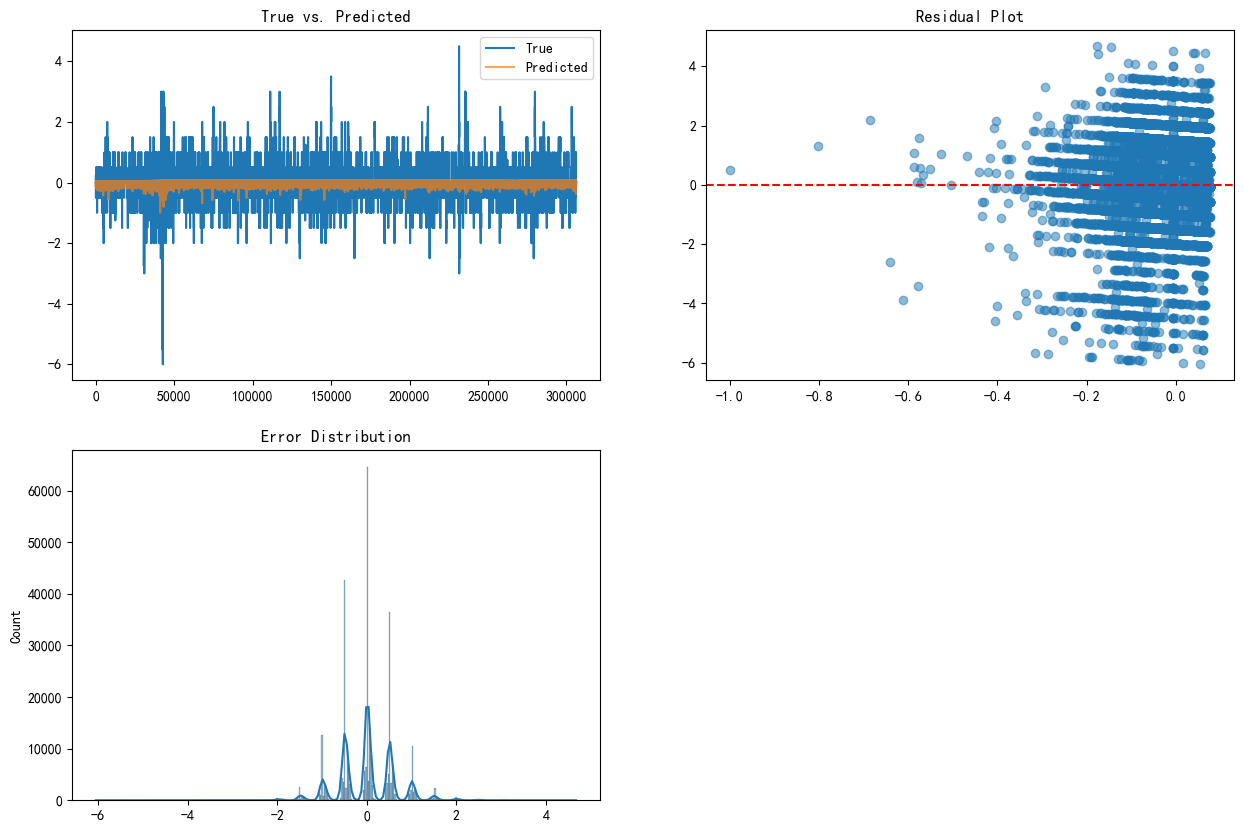

In [53]:
# 调用评估函数
evaluate_model(y_test, y_pred_test, model, X_test)